In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [36]:
df = pd.read_csv("IHMStefanini_industrial_safety_and_health_database.csv")
df.head(3)

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee ou Terceiro,Risco Critico
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools


In [37]:
df.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee type', 'Risco Critico':'Critical risk'}, inplace=True)
df.head(3)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee ou Terceiro,Critical risk
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools


In [38]:
df

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee ou Terceiro,Critical risk
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others
...,...,...,...,...,...,...,...,...,...
434,2017-07-04 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Others
435,2017-07-04 00:00:00,Country_01,Local_03,Mining,I,II,Female,Employee,Others
436,2017-07-05 00:00:00,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals
437,2017-07-06 00:00:00,Country_02,Local_05,Metals,I,II,Male,Employee,Cut


In [39]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].apply(lambda x : x.year)
df['Month'] = df['Date'].apply(lambda x : x.month)
df['Day'] = df['Date'].apply(lambda x : x.day)
df['Weekday'] = df['Date'].apply(lambda x : x.day_name())
df['WeekofYear'] = df['Date'].apply(lambda x : x.weekofyear)
df.head(3)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee ou Terceiro,Critical risk,Year,Month,Day,Weekday,WeekofYear
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,2016,1,1,Friday,53
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,2016,1,2,Saturday,53
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,2016,1,6,Wednesday,1


In [40]:
df['Country']=df['Country'].replace(['Country_02'],'Brazil')

In [41]:
df['Country']=df['Country'].replace(['Country_03'],'Cheli')

In [42]:
df['Country']=df['Country'].replace(['Country_01'],'Argentina')

In [43]:
df

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee ou Terceiro,Critical risk,Year,Month,Day,Weekday,WeekofYear
0,2016-01-01,Argentina,Local_01,Mining,I,IV,Male,Third Party,Pressed,2016,1,1,Friday,53
1,2016-01-02,Brazil,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,2016,1,2,Saturday,53
2,2016-01-06,Argentina,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,2016,1,6,Wednesday,1
3,2016-01-08,Argentina,Local_04,Mining,I,I,Male,Third Party,Others,2016,1,8,Friday,1
4,2016-01-10,Argentina,Local_04,Mining,IV,IV,Male,Third Party,Others,2016,1,10,Sunday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,2017-07-04,Argentina,Local_04,Mining,I,III,Male,Third Party,Others,2017,7,4,Tuesday,27
435,2017-07-04,Argentina,Local_03,Mining,I,II,Female,Employee,Others,2017,7,4,Tuesday,27
436,2017-07-05,Brazil,Local_09,Metals,I,II,Male,Employee,Venomous Animals,2017,7,5,Wednesday,27
437,2017-07-06,Brazil,Local_05,Metals,I,II,Male,Employee,Cut,2017,7,6,Thursday,27


In [44]:
def month2seasons(x):
    if x in [9, 10, 11]:
        season = 'Spring'
    elif x in [12, 1, 2]:
        season = 'Summer'
    elif x in [3, 4, 5]:
        season = 'Autumn'
    elif x in [6, 7, 8]:
        season = 'Winter'
    return season

In [45]:
df['Season'] = df['Month'].apply(month2seasons)
df.head(3)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee ou Terceiro,Critical risk,Year,Month,Day,Weekday,WeekofYear,Season
0,2016-01-01,Argentina,Local_01,Mining,I,IV,Male,Third Party,Pressed,2016,1,1,Friday,53,Summer
1,2016-01-02,Brazil,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,2016,1,2,Saturday,53,Summer
2,2016-01-06,Argentina,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,2016,1,6,Wednesday,1,Summer


In [46]:
df.to_csv('Accident_Data.csv')

In [47]:
df_csv=pd.read_csv('Accident_Data.csv')

In [48]:
df_csv

,Unnamed: 0,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee ou Terceiro,Critical risk,Year,Month,Day,Weekday,WeekofYear,Season
0,0,2016-01-01,Argentina,Local_01,Mining,I,IV,Male,Third Party,Pressed,2016,1,1,Friday,53,Summer
1,1,2016-01-02,Brazil,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,2016,1,2,Saturday,53,Summer
2,2,2016-01-06,Argentina,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,2016,1,6,Wednesday,1,Summer
3,3,2016-01-08,Argentina,Local_04,Mining,I,I,Male,Third Party,Others,2016,1,8,Friday,1,Summer
4,4,2016-01-10,Argentina,Local_04,Mining,IV,IV,Male,Third Party,Others,2016,1,10,Sunday,1,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,434,2017-07-04,Argentina,Local_04,Mining,I,III,Male,Third Party,Others,2017,7,4,Tuesday,27,Winter
435,435,2017-07-04,Argentina,Local_03,Mining,I,II,Female,Employee,Others,2017,7,4,Tuesday,27,Winter
436,436,2017-07-05,Brazil,Local_09,Metals,I,II,Male,Employee,Venomous Animals,2017,7,5,Wednesday,27,Winter
437,437,2017-07-06,Brazil,Local_05,Metals,I,II,Male,Employee,Cut,2017,7,6,Thursday,27,Winter


In [49]:
df_csv.columns

Index(['Unnamed: 0', 'Date', 'Country', 'Local', 'Industry Sector',
       'Accident Level', 'Potential Accident Level', 'Gender',
       'Employee ou Terceiro', 'Critical risk', 'Year', 'Month', 'Day',
       'Weekday', 'WeekofYear', 'Season'],
      dtype='object')

In [50]:
df_csv.drop(columns=["Unnamed: 0"],inplace=True)

In [51]:
df_csv

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee ou Terceiro,Critical risk,Year,Month,Day,Weekday,WeekofYear,Season
0,2016-01-01,Argentina,Local_01,Mining,I,IV,Male,Third Party,Pressed,2016,1,1,Friday,53,Summer
1,2016-01-02,Brazil,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,2016,1,2,Saturday,53,Summer
2,2016-01-06,Argentina,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,2016,1,6,Wednesday,1,Summer
3,2016-01-08,Argentina,Local_04,Mining,I,I,Male,Third Party,Others,2016,1,8,Friday,1,Summer
4,2016-01-10,Argentina,Local_04,Mining,IV,IV,Male,Third Party,Others,2016,1,10,Sunday,1,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,2017-07-04,Argentina,Local_04,Mining,I,III,Male,Third Party,Others,2017,7,4,Tuesday,27,Winter
435,2017-07-04,Argentina,Local_03,Mining,I,II,Female,Employee,Others,2017,7,4,Tuesday,27,Winter
436,2017-07-05,Brazil,Local_09,Metals,I,II,Male,Employee,Venomous Animals,2017,7,5,Wednesday,27,Winter
437,2017-07-06,Brazil,Local_05,Metals,I,II,Male,Employee,Cut,2017,7,6,Thursday,27,Winter


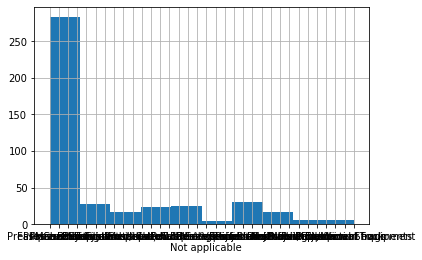

In [54]:
df_csv['Critical risk'].hist();

In [55]:
df_csv.isnull().sum()

Date                        0
Country                     0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee ou Terceiro        0
Critical risk               0
Year                        0
Month                       0
Day                         0
Weekday                     0
WeekofYear                  0
Season                      0
dtype: int64